# <font color='056938'> **Librerias** </font>

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [2]:
!pip install -q tensorflow


In [3]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive


#Red neuronal
from tensorflow import keras
import tensorflow as tf
from sklearn import metrics
from keras_tuner.tuners import RandomSearch
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import keras_tuner as kt


In [4]:
drive.mount('/content/drive')
#Define la parte del directorio que quieres trabajar
path = "/content/drive/MyDrive/Mod2/Salud"


Mounted at /content/drive


In [5]:
# Ruta al archivo
ruta = '/content/drive/MyDrive/Mod2/Salud/data/df_limpia.xlsx'

# Leer excel
df = pd.read_excel(ruta)
df

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627000,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351000,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672000,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167000,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,0.416104,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171000,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340000,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245000,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349000,47,1


In [6]:
sys.path.append(path)

from b_preprocesamiento import preparar_datos #Importar función que contiene los datos de entrenamiento, test y validación

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X_train: (537, 8), y_train: (537,)
 X_val: (154, 8), y_val: (154,)
 X_test: (77, 8), y_test: (77,)


In [7]:
X_train, X_val, X_test, y_train, y_val, y_test = preparar_datos(df)

# <font color='056938'> **Redes neuronales** </font>

<font color='056938'> **1.Modelo Base: Red Neuronal Artificial (ANN)**</font>

Se selecciona una red neuronal artificial (ANN) como modelo base, ya que es especialmente adecuada para el manejo de datos tabulares.

In [8]:
# Reproducción de resultados utilizando semilla aleatoria
keras.utils.set_random_seed(42)
# Definir la semilla para numpy
# Definir la semilla para el backend random
# Definir la semilla para python

tf.random.set_seed(42)

Se decide usar 128 como numero máximo de neuronas ya que los datos presentan una baja complejidad.

In [9]:
# Definición de hiperparámetros iniciales

ann1 = keras.models.Sequential()
# Capa de entrada
ann1.add(keras.layers.Dense(128, input_dim=X_train.shape[1], activation='tanh'))
# Capas ocultas
ann1.add(keras.layers.Dense(64, activation='relu'))
ann1.add(keras.layers.Dense(32, activation='relu'))
# Capa de salida para clasificación binaria (activación sigmoide)
ann1.add(keras.layers.Dense(1, activation='sigmoid'))

# Resumen de la arquitectura y # total de parametros
ann1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

El optimizador seleccionado es "adam" ya que combina las ventajas de los algoritmos de gradiente descendente con momento y RMSprop, adaptándose dinámicamente a la tasa de aprendizaje de cada parámetro. Además, se usa la función de perdida "binary_crossentropy", ya que es la que se debe usar para problemas de clasificación como es el caso. Como métrica de rendimiento, se utiliza "Accuracy", ya que proporciona una interpretación intuitiva de cuán bien el modelo clasifica correctamente los datos de prueba.

In [10]:
# Compilación de la ANN1 (Optimización de la ANN)
ann1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Entrenamiento de la Red Neuronal
history = ann1.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5853 - loss: 0.6729 - val_accuracy: 0.7143 - val_loss: 0.5823
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7731 - loss: 0.5176 - val_accuracy: 0.7208 - val_loss: 0.5243
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7834 - loss: 0.4557 - val_accuracy: 0.7143 - val_loss: 0.5254
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7817 - loss: 0.4410 - val_accuracy: 0.7403 - val_loss: 0.5308
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7831 - loss: 0.4335 - val_accuracy: 0.7468 - val_loss: 0.5328
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7921 - loss: 0.4263 - val_accuracy: 0.7468 - val_loss: 0.5360
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7855 - loss: 0.4200 - val_accuracy: 0.7532 - val_loss: 0.5402
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7825 - loss: 0.4144 - val_accuracy: 0.7597 - val

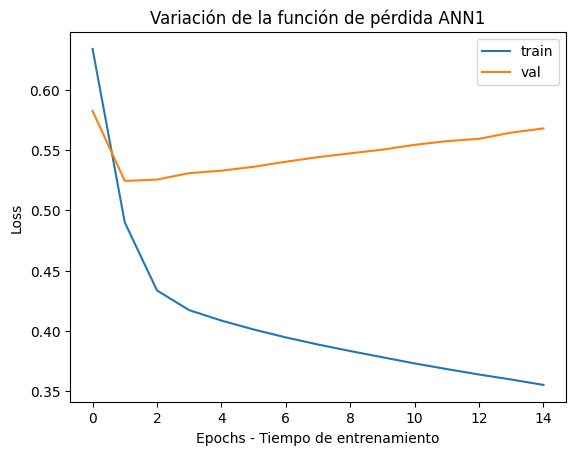

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

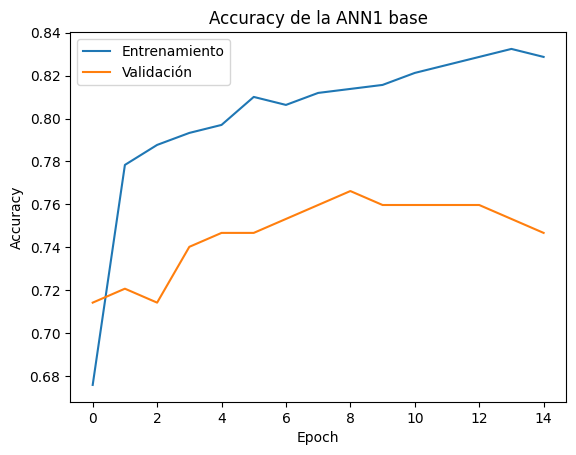

In [12]:
# Visualización de las curvas de error

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Variación de la función de pérdida ANN1')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

# Visualización de las curcas de la métrica: Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy de la ANN1 base')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc = 'upper left')
plt

Dado a que se evidencia sobreajuste se realiza un modelo ANN2 donde se le aplicara regularización L2  y otro modelo ANN3 en el cual se le aplicara Dropout. Con el fin si se evidencia alguna mejora.

<font color='056938'> **2.Modelo ANN2 con Regularización L2**</font>

Se aplica una regularización L2 solo a la primera capa oculta con una tasa de regularización de 0.01.

In [13]:
from tensorflow.keras import regularizers

ann2 = keras.models.Sequential()
# Capa de entrada
ann2.add(keras.layers.Dense(128, input_dim=X_train.shape[1], activation='tanh'))
# Capas ocultas
ann2.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
ann2.add(keras.layers.Dense(32, activation='relu'))
# Capa de salida para clasificación binaria (activación sigmoide)
ann2.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
# Compilación de la ANN1 (Optimización de la ANN)
ann2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Entrenamiento de la Red Neuronal
history2 = ann2.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5850 - loss: 1.4787 - val_accuracy: 0.6883 - val_loss: 1.2681
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7694 - loss: 1.1803 - val_accuracy: 0.7013 - val_loss: 1.0887
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7662 - loss: 1.0068 - val_accuracy: 0.7078 - val_loss: 0.9772
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7661 - loss: 0.8930 - val_accuracy: 0.7143 - val_loss: 0.8880
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7663 - loss: 0.8012 - val_accuracy: 0.7143 - val_loss: 0.8193
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7669 - loss: 0.7278 - val_accuracy: 0.7143 - val_loss: 0.7652
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7667 - loss: 0.6698 - val_accuracy: 0.7338 - val_loss: 0.7227
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7655 - loss: 0.6246 - val_accuracy: 0.7273 - val_loss

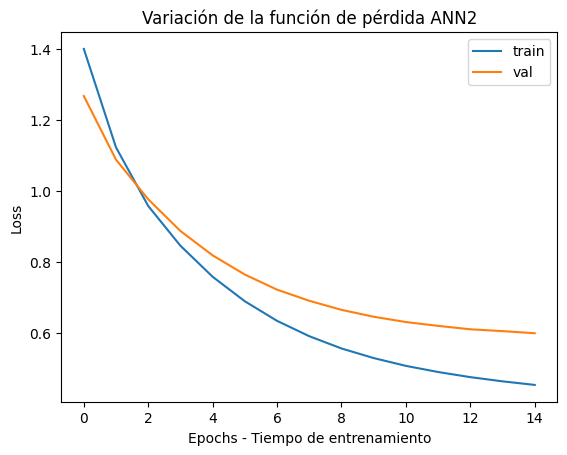

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

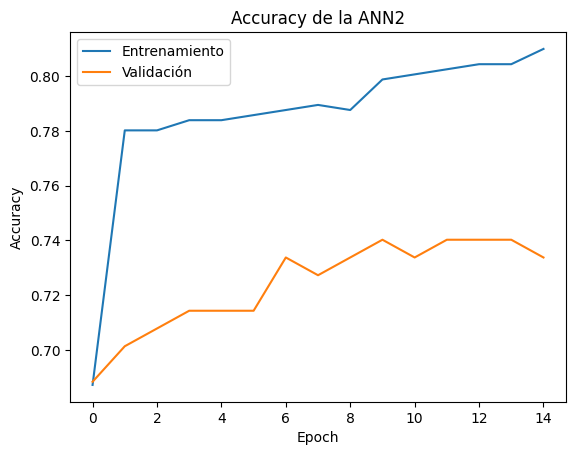

In [15]:
# Visualización de las curvas de error

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Variación de la función de pérdida ANN2')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

# Visualización de las curcas de la métrica: Accuracy

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy de la ANN2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc = 'upper left')
plt

<font color='056938'> **3.Modelo ANN3 con Dropout**</font>

Se aplicará Dropout con una tasa del 30% a la capa de entrada, debido a su mayor número de neuronas.


In [16]:
ann3 = keras.models.Sequential()
# Capa de entrada
ann3.add(keras.layers.Dense(128, input_dim=X_train.shape[1], activation='tanh'))
#Dropout
ann3.add(keras.layers.Dropout(0.3))
# Capas ocultas
ann3.add(keras.layers.Dense(64, activation='relu'))
ann3.add(keras.layers.Dense(32, activation='relu'))
# Capa de salida para clasificación binaria (activación sigmoide)
ann3.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
# Compilación de la ANN1 (Optimización de la ANN)
ann3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Entrenamiento de la Red Neuronal
history3 = ann3.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6146 - loss: 0.6364 - val_accuracy: 0.7468 - val_loss: 0.5221
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7626 - loss: 0.4827 - val_accuracy: 0.7597 - val_loss: 0.5076
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7693 - loss: 0.4639 - val_accuracy: 0.7338 - val_loss: 0.5123
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7790 - loss: 0.4463 - val_accuracy: 0.7403 - val_loss: 0.5114
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7790 - loss: 0.4544 - val_accuracy: 0.7403 - val_loss: 0.5120
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7686 - loss: 0.4526 - val_accuracy: 0.7338 - val_loss: 0.5191
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7773 - loss: 0.4304 - val_accuracy: 0.7403 - val_loss: 0.5242
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7733 - loss: 0.4376 - val_accuracy: 0.7338 - val_loss

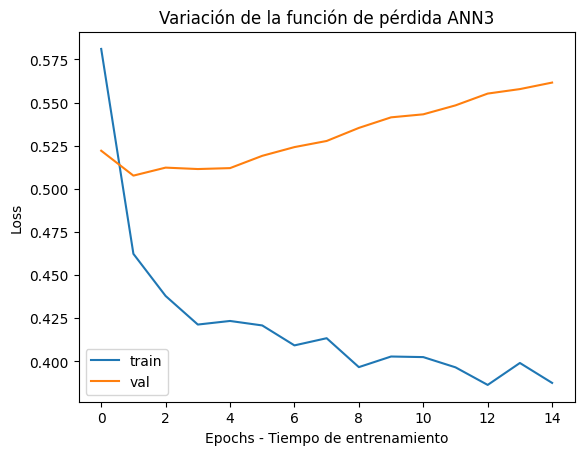

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

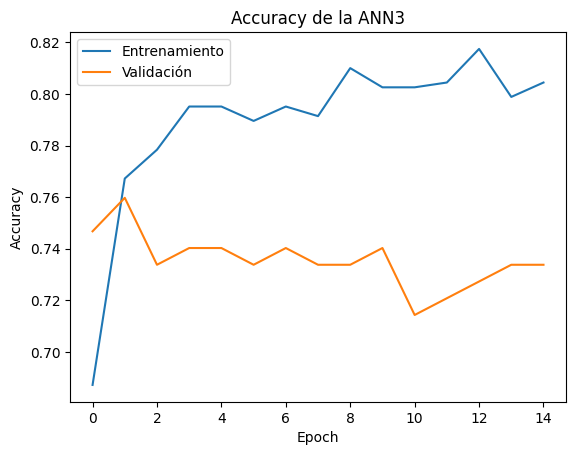

In [18]:
# Visualización de las curvas de error

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Variación de la función de pérdida ANN3')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

# Visualización de las curcas de la métrica: Accuracy

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy de la ANN3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc = 'upper left')
plt

<font color='056938'> **4.Modelo ANN4: Mejor modelo encontrado Utilizando Óptimización de hiperparámetros**</font>

La optimización del modelo se centró en la afinación de los hiperparámetros más influyentes en el rendimiento de la red neuronal: el número de neuronas por capa, las funciones de activación y la tasa de aprendizaje. Se exploraron diversas combinaciones de estos parámetros con el fin de identificar la configuración óptima. Considerando los resultados obtenidos en experimentos previos, se decidió no incluir técnicas de regularización adicionales como L2 o Dropout, y tampoco se decidio probar varias opciones de numeros de capas, dada a que en nuestro caso el problema a resolver no presenta una complejidad excesiva, por tanto se deja la arquitectura del modelo base.

In [19]:
# Definir la función para construir el modelo
def build_model(hp):
    model = keras.models.Sequential()

    # Capa de entrada
    model.add(keras.layers.Dense(
        units=hp.Int('units_input', min_value=32, max_value=256, step=64),  # Número de neuronas
        activation=hp.Choice('activation_input', values=['relu', 'tanh']),  # Función de activación
        input_dim=X_train.shape[1]
    ))

    # Capa oculta 1
    model.add(keras.layers.Dense(
        units=hp.Int('units_hidden1', min_value=16, max_value=128, step=32),
        activation=hp.Choice('activation_hidden1', values=['relu', 'tanh'])
    ))

    # Capa oculta 2
    model.add(keras.layers.Dense(
        units=hp.Int('units_hidden2', min_value=8, max_value=64, step=16),
        activation=hp.Choice('activation_hidden2', values=['relu', 'tanh'])
    ))

    # Capa de salida
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Clasificación binaria

     # Definición del compilador con optimización del hiperparámetro lr
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

    return model

In [20]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',  # Métrica objetivo
    max_trials=5,  # Número máximo de combinaciones de hiperparámetros
    executions_per_trial=2,  # Número de ejecuciones por combinación
    directory='results_tuner',
    project_name='mujeres_diabetes'
)

In [21]:
# Ejecución de la búsqueda aleatoria
tuner.search(X_train, y_train, epochs = 15, validation_data = (X_val, y_val))

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.7305195033550262

Best val_accuracy So Far: 0.7532467544078827
Total elapsed time: 00h 01m 22s


In [22]:
# Obtener los mejores hiperparámetros
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hiperparámetros encontrados:")
print(best_hp.values)

Mejores hiperparámetros encontrados:
{'units_input': 160, 'activation_input': 'relu', 'units_hidden1': 48, 'activation_hidden1': 'relu', 'units_hidden2': 8, 'activation_hidden2': 'tanh', 'learning_rate': 0.001}


Podemos evidenciar que los hiperparámetros encontrados generan un modelo no tan complejo, ya que el número de neuronas escogidas son valores de no maximo 64 neuronas. Por otro lado, la tasa de arendizaje de 0.001, sugiere que los ajustes en los pesos de la red se realizan de forma gradual y cuidadosa, lo cual ayuda a evitar el riesgo de sobreajuste.

In [49]:
# Reconstruir el mejor modelo
best_ANN = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [24]:
## Ajuste de la red neuronal con hiperparámetros óptimos
history_4 = best_ANN.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7709 - loss: 0.4305 - val_accuracy: 0.7338 - val_loss: 0.5311
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7870 - loss: 0.4108 - val_accuracy: 0.7468 - val_loss: 0.5306
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7900 - loss: 0.4036 - val_accuracy: 0.7403 - val_loss: 0.5315
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7929 - loss: 0.3972 - val_accuracy: 0.7403 - val_loss: 0.5358
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7941 - loss: 0.3905 - val_accuracy: 0.7468 - val_loss: 0.5395
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8043 - loss: 0.3831 - val_accuracy: 0.7468 - val_loss: 0.5456
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8039 - loss: 0.3765 - val_accuracy: 0.7468 - val_loss: 0.5505
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8108 - loss: 0.3686 - val_accuracy: 0.7338 - val_lo

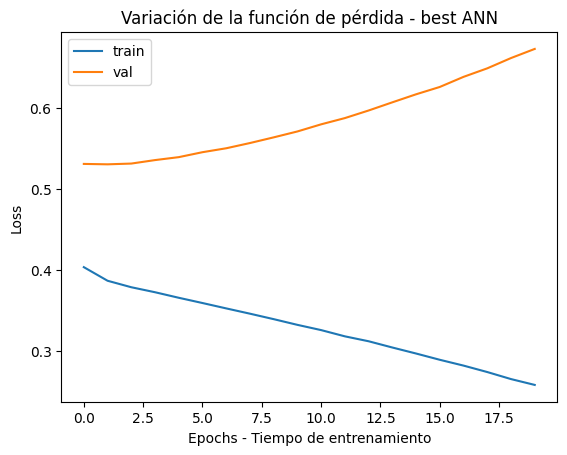

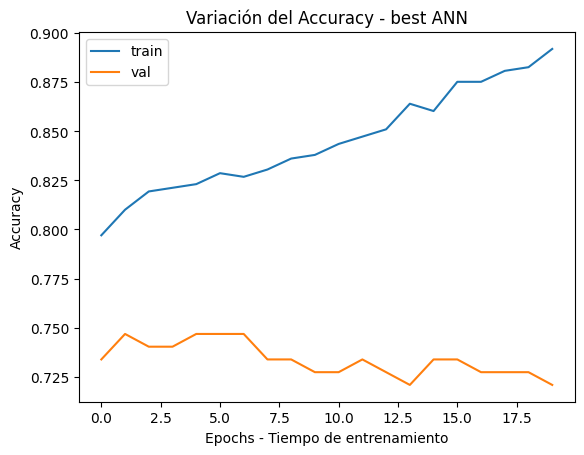

In [25]:
# Visualización de las curvas de error
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Variación de la función de pérdida - best ANN')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

# Visualización de las curvas de Accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Variación del Accuracy - best ANN')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

Al analizar la **gráfica de la función de pérdida del mejor modelo de red neuronal (best ANN)**, observamos que a pesar de haber optimizado los hiperparámetros, la curva de validación muestra un aumento progresivo en lugar de disminuir a lo largo de las épocas. Este comportamiento indica que el modelo está sobreajustándose a los datos de entrenamiento, es decir, está memorizando los datos específicos del conjunto de entrenamiento en lugar de aprender las características generales que le permitan generalizar a nuevos datos.

De manera similar, la **gráfica de Accuracy del modelo** revela que, aunque la precisión en el conjunto de entrenamiento aumenta, la precisión en el conjunto de validación disminuye en las últimas épocas. Esta tendencia confirma el sobreajuste, ya que el modelo está obteniendo un rendimiento excelente en los datos que ya ha visto (conjunto de entrenamiento), pero su desempeño empeora significativamente en datos no vistos (conjunto de validación).

En resumen, los resultados obtenidos sugieren que la configuración actual de hiperparámetros y posiblemente la arquitectura de la red no son las más adecuadas para evitar el sobreajuste.

<font color='056938'> **5.Evaluación de los 4 modelos**</font>

Se evaluan los 4 modelos anteriamiente analizados, ya que en forma visual o grafica no se evidenció una mejora significativa de un modelo con otro. Por tanto, para escoger el mejor modelo se evaluan con respecto a los datos de prueba.

In [26]:
test_loss_ann1, test_acc_ann1 = ann1.evaluate(X_test, y_test)
test_loss_ann2, test_acc_ann2 = ann2.evaluate(X_test, y_test)
test_loss_ann3, test_acc_ann3 = ann3.evaluate(X_test, y_test)
test_loss_ann4, test_acc_ann4 = best_ANN.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7334 - loss: 0.6422
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7334 - loss: 0.6586
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7516 - loss: 0.6370
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6983 - loss: 0.7266


In [27]:
# Crear un diccionario con los resultados
results = {
    'Model': ['Modelo Base (ann1)', 'Modelo con Regularization L2 (ann2)', 'Modelo con Dropout (ann3)', 'Modelo optimizado (best_ann)'],
    'Test Accuracy': [test_acc_ann1, test_acc_ann2, test_acc_ann3, test_acc_ann4],
    'Test Loss': [test_loss_ann1, test_loss_ann2, test_loss_ann3, test_loss_ann4]
}

# Crear un DataFrame a partir del diccionario
df_results = pd.DataFrame(results)

# Mostrar la tabla con los resultados
df_results

,Model,Test Accuracy,Test Loss
0,Modelo Base (ann1),0.740260,0.600868
1,Modelo con Regularization L2 (ann2),0.740260,0.623095
2,Modelo con Dropout (ann3),0.753247,0.594779
3,Modelo optimizado (best_ann),0.701299,0.678785


De acuerdo con los resultados obtenidos, el modelo **ANN3** con Dropout se destaca como el mejor candidato, presentando el menor error de prueba (test loss) y la mayor precisión de prueba (test accuracy) entre los modelos evaluados. Sin embargo, es importante señalar que el error de prueba sigue siendo considerablemente alto, superando el 50%. Este resultado sugiere que, aunque el modelo ANN3 es superior a los demás en este conjunto de datos, su capacidad para generalizar a nuevos datos no vistos podría ser limitada.

<font color='056938'> **Análisis del modelo ganador**</font>

In [50]:
# Evaluación en el conjunto de prueba
test_loss, test_auc = best_ANN.evaluate(X_test, y_test)
print(f"\nMejor AUC on test set: {test_auc:.4f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7334 - loss: 0.5978 

Mejor AUC on test set: 0.7403


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Text(0.5, 0, 'Probabilidad de tener diabetes')

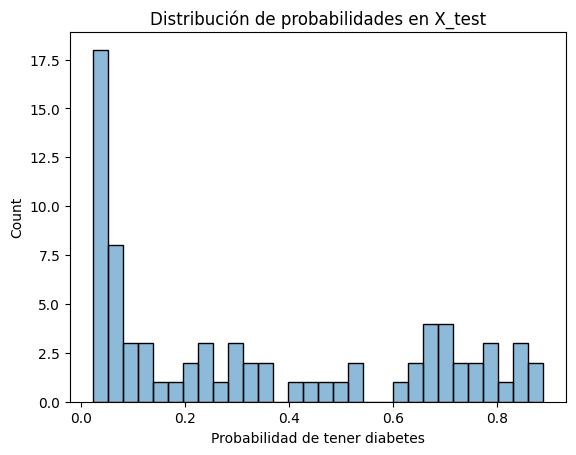

In [51]:
####probabilidades en test #######

prob=best_ANN.predict(X_test)
sns.histplot(prob, legend=False, bins=30)
plt.title("Distribución de probabilidades en X_test")
plt.xlabel("Probabilidad de tener diabetes")

Se observaron agrupaciones de predicciones cercanas a 0 y a 1, lo que sugiere que el modelo tiene alta confianza en muchas de sus predicciones.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Text(0.5, 0, 'Probabilidad de tener diabetes')

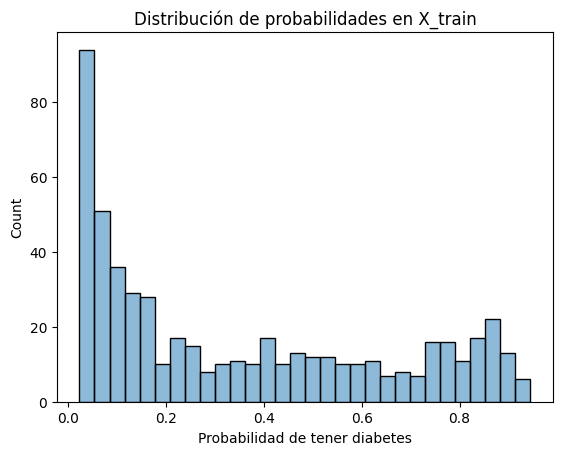

In [52]:

### probabilidades en entrenamiento #####
prob1=best_ANN.predict(X_train)
sns.histplot(prob1, legend=False, bins=30)
plt.title("Distribución de probabilidades en X_train")
plt.xlabel("Probabilidad de tener diabetes")

Se observaron agrupaciones de predicciones cercanas a 0, lo que sugiere que el modelo tiene alta confianza en muchas de sus predicciones en los datos de entrenamento cuando no se tiene diabetes.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       349
           1       0.75      0.72      0.74       188

    accuracy                           0.82       537
   macro avg       0.80      0.80      0.80       537
weighted avg       0.82      0.82      0.82       537

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        52
           1       0.62      0.64      0.63        25

    accuracy                           0.75        77
   macro avg       0.72      0.72      0.72        77
weighted avg       0.76      0.75      0.75        77



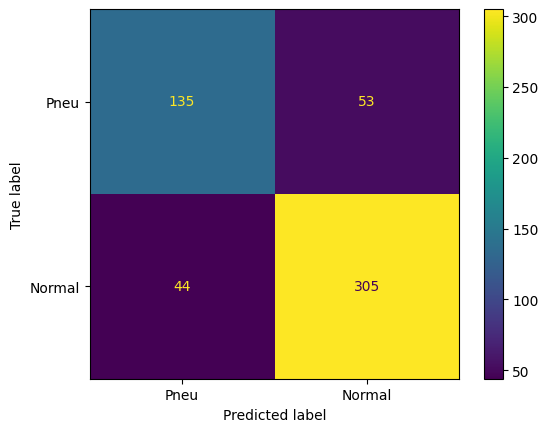

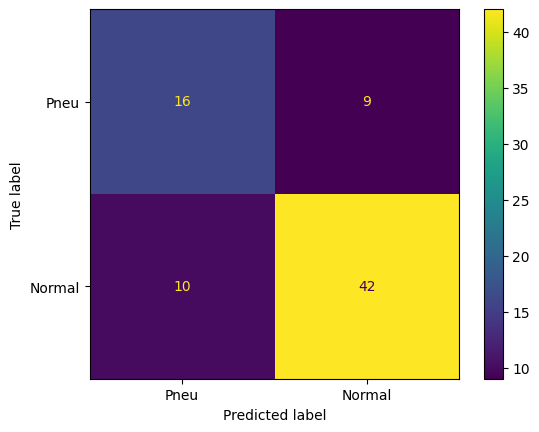

In [58]:
threshold_diabetes=0.5

pred_train=(ann3.predict(X_train)>=threshold_diabetes).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'Normal'])
disp.plot()




pred_test=(ann3.predict(X_test)>=threshold_diabetes).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'Normal'])
disp.plot()

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.29      0.17      0.22       349
           1       0.11      0.19      0.14       188

    accuracy                           0.18       537
   macro avg       0.20      0.18      0.18       537
weighted avg       0.23      0.18      0.19       537

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        52
           1       0.19      0.32      0.24        25

    accuracy                           0.32        77
   macro avg       0.34      0.32      0.32        77
weighted avg       0.40      0.32      0.34        77



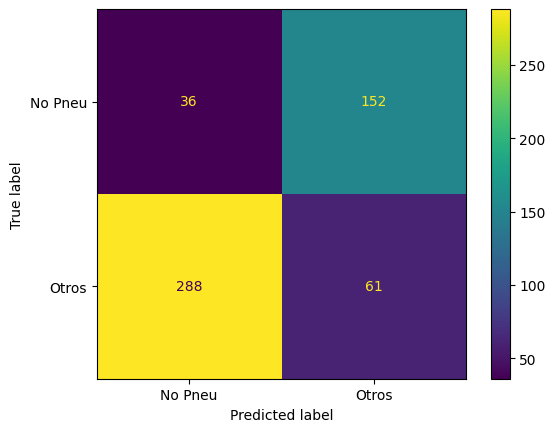

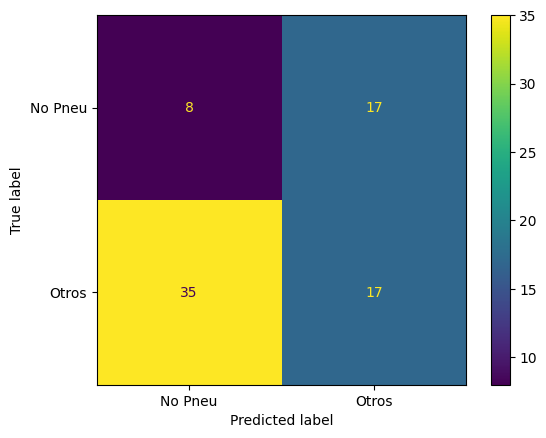

In [60]:
threshold_no_diabetes=0.4

pred_train=(ann3.predict(X_train)<=threshold_no_diabetes).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['No Pneu', 'Otros'])
disp.plot()

pred_test=(ann3.predict(X_test)<=threshold_no_diabetes).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['No Pneu', 'Otros'])
disp.plot()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       349
           1       0.82      0.60      0.69       188

    accuracy                           0.81       537
   macro avg       0.81      0.76      0.78       537
weighted avg       0.81      0.81      0.80       537

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        52
           1       0.61      0.44      0.51        25

    accuracy                           0.73        77
   macro avg       0.69      0.65      0.66        77
weighted avg       0.71      0.73      0.71        77



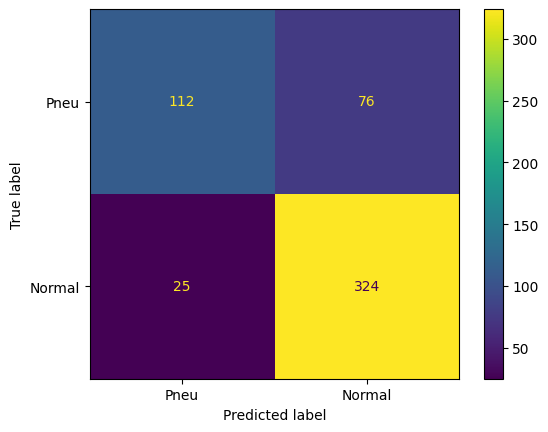

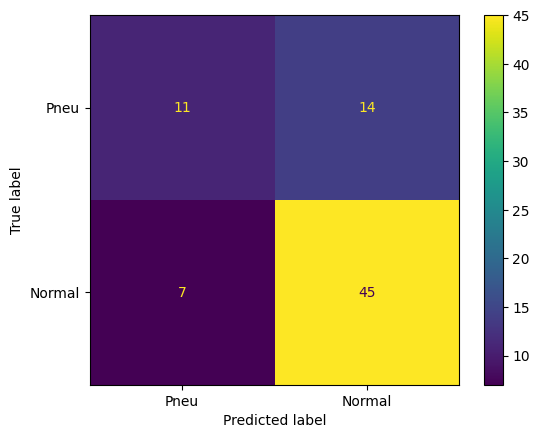

In [62]:
threshold_diab=0.6

pred_train=(ann3.predict(X_train)>=threshold_diab).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'Normal'])
disp.plot()




pred_test=(ann3.predict(X_test)>=threshold_diab).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'Normal'])
disp.plot()

In [67]:
prob = ann3.predict(X_test).ravel()

thresholds = {
    'Threshold 0.4': 0.4,
    'Threshold 0.5': 0.5,
    'Threshold 0.6': 0.6  }

def clasificar_y_contar(prob, threshold):
    clases = []
    for p in prob:
        if p > threshold:
            clases.append("Diabetes")
        elif p < 1 - threshold:
            clases.append("No diabetes")
        else:
            clases.append("No ident")
    clases_np = np.array(clases)
    labels, counts = np.unique(clases_np, return_counts=True)
    total = counts.sum()
    porcentaje = {label: count * 100 / total for label, count in zip(labels, counts)}
    return porcentaje

print("📊 Comparativo de thresholds\n")
for nombre, th in thresholds.items():
    resultados = clasificar_y_contar(prob, th)
    print(f"🔹 {nombre} (t={th}):")
    for clase in ['Diabetes', 'No diabetes', 'No ident']:
        porcentaje = resultados.get(clase, 0)
        print(f"   {clase}: {porcentaje:.2f}%")
    print()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
📊 Comparativo de thresholds

🔹 Threshold 0.4 (t=0.4):
   Diabetes: 44.16%
   No diabetes: 55.84%
   No ident: 0.00%

🔹 Threshold 0.5 (t=0.5):
   Diabetes: 33.77%
   No diabetes: 66.23%
   No ident: 0.00%

🔹 Threshold 0.6 (t=0.6):
   Diabetes: 23.38%
   No diabetes: 55.84%
   No ident: 20.78%



Como estamos en busca de un umbral para diagnóstico temprano, esto significa detectar la mayoría de los casos reales de diabetes, aunque eso implique cometer algunos errores (falsos positivos).Porque no diagnosticar a una persona que sí tiene diabetes puede traer consecuencias graves a largo plazo (ceguera, amputaciones, infartos). Un falso positivo, en cambio, solo llevará a hacer más exámenes (no pone en riesgo la vida del paciente). Es por esto que definimos el threshold en 0.5 y no valores menores o mayores ya que es el que mejor predice la mayor cantidad de los que no tienen diabetes de manera acertiva y tambien predice el mayor valor de verdaderos positivos con 16 mujeres  que predice con diabetes y que si tienen diabetes.

<font color='056938'> **Predicciones mejor modelo de red neuronal: Modelo con Dropout**</font>

In [63]:
#Prediccion del mejor modelo
y_test_pred_ann3= ann3.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Para evaluar la capacidad del modelo de predecir correctamente si una persona tiene diabetes, se construye una matriz de confusión. Dado que la red neuronal genera probabilidades de pertenecer a cada clase, se establece un umbral de 0.5: si la probabilidad predicha es superior a 0.5, se clasifica al individuo como diabético (1); de lo contrario, se clasifica como no diabético (0).

[[42 10]
 [ 9 16]]


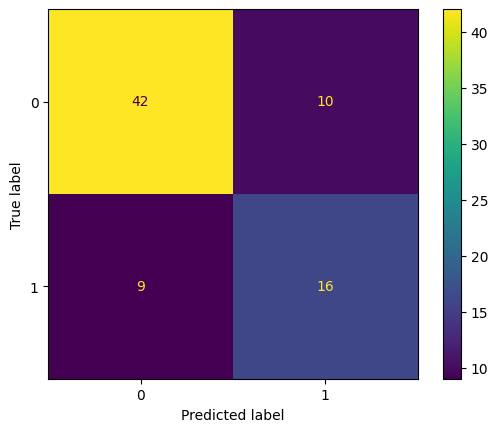

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred_ann3= (y_test_pred_ann3 > 0.5).astype(int)  # Convertir a clases binarias

# Generar la matriz de confusión
cm_test_ann = confusion_matrix(y_test, y_test_pred_ann3)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_ann, display_labels=[0, 1])  # Ajustar etiquetas según las clases
disp.plot()

# Imprimir la matriz de confusión
print(cm_test_ann)

In [65]:
tn, fp, fn, tp = cm_test_ann.ravel()

Accuracy_ANN= accuracy_score(y_test, y_test_pred_ann3)
precision_ANN = tp / (tp + fp)
recall_ANN = tp / (tp + fn)
especificidad_ANN = tn / (fp + tn)
f1_score_ANN = 2*(precision_ANN*recall_ANN)/(precision_ANN+recall_ANN)

print(f"Accuracy test: {Accuracy_ANN}")
print(f'Precision: {precision_ANN}')
print(f'Recall: {recall_ANN}')
print(f'Especificidad: {especificidad_ANN}')
print(f'F1 score: {f1_score_ANN}')

Accuracy test: 0.7532467532467533
Precision: 0.6153846153846154
Recall: 0.64
Especificidad: 0.8076923076923077
F1 score: 0.6274509803921569


**Accuracy:** El modelo clasifica correctamente el 75.32% de las muestras en general, es decir, acierta a predecir si una persona tiene o no diabetes en el 75.32% de los casos.

**Precision:** De todas las muestras que el modelo clasificó con diabetes, el 61.54% realmente eran diabeticas.

**Recall:** El modelo identifica captura el 64% de todas las personas con diabetes en el conjunto de datos.

**Especificidad:** cuando el modelo dice que alguien no tiene diabetes, tiene razón en el 80.77% de los casos.